This model deals with the contents of Section 5.4 of the book.

In [1]:
import numpy as np
import pandas as pd
from cmdstanpy import CmdStanModel
from matplotlib import pyplot as plt

# Load data

The data used here is the same as those used in `002_sec5.2.ipynb`.

In [2]:
df = pd.read_csv("./data/data-attendance-2.txt")
print(df.count())
df.head(5)

PersonID    50
A           50
Score       50
M           50
Y           50
dtype: int64


,PersonID,A,Score,M,Y
0,1,0,69,43,38
1,2,1,145,56,40
2,3,0,125,32,24
3,4,1,86,45,33
4,5,1,158,33,23


# Run Stan

In [3]:
model = CmdStanModel(stan_file="model/model5-6b.stan")
print(model)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /workdir/chap05/model/model5-6b


CmdStanModel: name=model5-6b
	 stan_file=/workdir/chap05/model/model5-6b.stan
	 exe_file=/workdir/chap05/model/model5-6b
	 compiler_optons=stanc_options=None, cpp_options=None


In [4]:
data = {
    "N" : len(df),
    "A" : df["A"].values,
    "Score" : df["Score"].values/200,
    "M" : df["M"].values,
}

In [5]:
fit = model.sample(data=data)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 4


# Inspect the result

In [6]:
print(fit)

CmdStanMCMC: model=model5-6b chains=4['method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 csv_files:
	/tmp/tmpkgj47vhr/model5-6b-202009220511-1-zb2mzp4q.csv
	/tmp/tmpkgj47vhr/model5-6b-202009220511-2-9kuasynj.csv
	/tmp/tmpkgj47vhr/model5-6b-202009220511-3-9d_id_bt.csv
	/tmp/tmpkgj47vhr/model5-6b-202009220511-4-b_lrh7pj.csv
 output_files:
	/tmp/tmpkgj47vhr/model5-6b-202009220511-1-zb2mzp4q-stdout.txt
	/tmp/tmpkgj47vhr/model5-6b-202009220511-2-9kuasynj-stdout.txt
	/tmp/tmpkgj47vhr/model5-6b-202009220511-3-9d_id_bt-stdout.txt
	/tmp/tmpkgj47vhr/model5-6b-202009220511-4-b_lrh7pj-stdout.txt


In [7]:
print(fit.num_draws)
print(fit.draws().shape)

1000
(1000, 4, 110)


In [8]:
for key, val in fit.stan_variables().items():
    print(key, val.shape)

b (4000, 3)
lambda (4000, 50)
m_pred (4000, 50)


In [9]:
fit_summary = fit.summary()
fit_summary

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,6896.50,0.035503,1.26321,6894.030,6896.82,6897.88,1265.96,1616.81,0.999799
b[1],3.60,0.003100,0.09900,3.400,3.60,3.70,1026.00,1310.00,1.000000
b[2],0.26,0.001100,0.04200,0.200,0.26,0.33,1448.00,1850.00,1.000000
b[3],0.30,0.004800,0.16000,0.041,0.30,0.55,1047.00,1337.00,1.000000
lambda[1],3.70,0.001500,0.05000,3.600,3.70,3.80,1113.00,1422.00,1.000000
...,...,...,...,...,...,...,...,...,...
m_pred[46],42.00,0.100000,6.50000,32.000,42.00,53.00,3976.00,5078.00,1.000000
m_pred[47],39.00,0.120000,6.60000,28.000,38.00,50.00,2866.00,3660.00,1.000000
m_pred[48],44.00,0.110000,6.90000,34.000,44.00,56.00,3703.00,4730.00,1.000000


In [10]:
fit_summary[fit_summary["R_hat"] >= 1.1]

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,


In [11]:
print(fit.diagnose())

INFO:cmdstanpy:Processing csv files: /tmp/tmpkgj47vhr/model5-6b-202009220511-1-zb2mzp4q.csv, /tmp/tmpkgj47vhr/model5-6b-202009220511-2-9kuasynj.csv, /tmp/tmpkgj47vhr/model5-6b-202009220511-3-9d_id_bt.csv, /tmp/tmpkgj47vhr/model5-6b-202009220511-4-b_lrh7pj.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


Processing csv files: /tmp/tmpkgj47vhr/model5-6b-202009220511-1-zb2mzp4q.csv, /tmp/tmpkgj47vhr/model5-6b-202009220511-2-9kuasynj.csv, /tmp/tmpkgj47vhr/model5-6b-202009220511-3-9d_id_bt.csv, /tmp/tmpkgj47vhr/model5-6b-202009220511-4-b_lrh7pj.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


# Plot the result

This is the contents of exercise (5).

In [12]:
m_pred_percentiles = np.percentile(fit.stan_variable("m_pred"), [10.0, 50.0, 90.0], axis=0)

Text(0, 0.5, 'predicted')

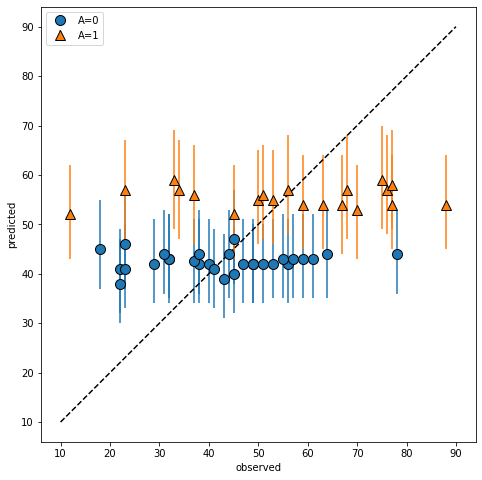

In [13]:
# exercise (5)
# observation vs. prediction
# Apparently, the model did not work well.

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)

idx0 = np.where(df["A"].values == 0)[0]
idx1 = np.where(df["A"].values == 1)[0]

ax.errorbar(
    x=df["M"].values[idx0], 
    y=m_pred_percentiles[1][idx0], 
    yerr=np.abs(m_pred_percentiles[[0, 2]][:, idx0] - m_pred_percentiles[1][idx0]),
    fmt='o',
    markersize=10,
    markeredgecolor='k',
    label="A=0"
)

ax.errorbar(
    x=df["M"].values[idx1], 
    y=m_pred_percentiles[1][idx1], 
    yerr=np.abs(m_pred_percentiles[[0, 2]][:, idx1] - m_pred_percentiles[1][idx1]),
    fmt='^',
    markersize=10,
    markeredgecolor='k',
    label="A=1"
)

ax.legend()
ax.plot([10.0, 90.0], [10.0, 90.0], 'k--')
ax.set_aspect("equal")
ax.set_xlabel("observed")
ax.set_ylabel("predicted")